---
<h1 style=\"text-align: center;font-size: 30px;\">HOTEL DEMAND ANALYSIS PROJECT</h1>

---
<center><img
src="Images\HotelDemand.png"
></center>

# Hotel Demand Analysis

# 1. Project Overview
This project analyzes a hotel booking demand, the dataset is from Kaggle website to help understand and predict hotel demand. The dataset Contains Information on various booking attributes, including:
* Hotel type
* Booking Dates
* Guest Demographics
* Room Type
* Cancellation Status
* Countries of Visitors

The analysis aims to identify key factors influencing hotel medand, which visitors proportion, demographic of the visitors to help provide insights that can help the hotel optimize their operations and enhance customer Satisfaction

# 2. Data Understanding 
Before performing any analysis, it's essential to understand the structure and contents of the hotel booking dataset. This involves examining data types, identifying missing values, and exploring key features.  This section provides an overview of the dataset's characteristics.

Booking Information: This section includes details about each booking:
* Hotel: Type of hotel (Resort Hotel or City Hotel).
* Is Canceled: Binary indicator (0 or 1) if the booking was canceled.
* Lead Time: Number of days between booking and arrival.
* Arrival Date: Year, month, week number, and day of month.
* Stays in Weekend/Week Nights: Number of weekend and week nights booked.

Guest Demographics and Details: This section describes the guests:
* Adults, Children, Babies: Number of each type of guest.
* Meal: Type of meal booked (e.g., BB, HB, FB).
* Country: Country of origin.
* Market Segment: Market segment of the booking (e.g., Online TA, Offline TA/TO).
* Distribution Channel: How the booking was made (e.g., TA/TO, Direct).
* Is Repeated Guest: Binary indicator if the guest is a repeat customer.

Room and Booking Characteristics: Details about the room and booking:
* Reserved Room Type: Type of room reserved.
* Assigned Room Type: Type of room actually assigned.
* Booking Changes: Number of changes made to the booking.
* Deposit Type: Type of deposit made (e.g., No Deposit, Non Refund).
* Agent, Company: ID of the booking agent or company.

Booking Status and Price: Information about the booking status and price:
* Days in Waiting List: Number of days the booking was on the waiting list.
* Customer Type: Type of customer (e.g., Transient, Contract).
* ADR (Average Daily Rate): Average daily price of the room.
* Required Car Parking Spaces: Number of car parking spaces requested.
* Total of Special Requests: Number of special requests made by the guest.
* Reservation Status: Current status of the reservation (e.g., Check-Out, Canceled).

## Importing the necessary Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Creating the images directory upfront

### Loading Data

In [77]:
images_dir = "images"
if not os.path.exists(images_dir):
    os.makedirs(images_dir)

In [78]:
# Load the csv dataset as a dataframe
path = (r"C:\Users\ngeti\Documents\Moringa\dsc-data-science-env-config\Intro_to_git\Phase1\assessments\Project\HoteL Booking Data\Data\hotel_bookings.csv")
data = pd.read_csv(path)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [79]:
# Display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [80]:
data.tail() # Previewing the last rows and columns of data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


## Exploring the dataset

In [81]:
# checking the shape of the dataset
data.shape

(119390, 32)

In [82]:
# Checking the data types and non-null in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Info as from the dataframe:
The dataset contains the following properties
* It has 119390 rows with 32 columns
* Has the hotel name as Resort hotel or City hotel
* Columns provide information on whether the bookings was cancelled, arival time yearly, monthly, week_number, day of the month, stays in week nights and weekends
* Those who demanded the service are adults, children, babies whether they had previously requested as guests, previous cancellations, reserved room types as well as the assigned rooms
* Whether they booked via a company or agent, the customer type, required car parking spaces as well as reservation status and the date.
* The column with the company seems to have missing values as well as the reservation per agent along with the country column
* The dtype is of the following float64 (4), integer64(16) and object(12)

## Checking for missing Values

In [83]:
print(data.dtypes)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [84]:
# Check the number of missing values
missing_data = data.isna().sum()
missing_data

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [85]:
# Checking the percentage of missing values
missing_percentage = round((data.isnull().sum() / len(data) * 100), 2)
missing_percentage

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


* From the data country has a smaller margin of missing data as compared to the high percentage in company column.Agent also has a slight percentage in missing data

In [86]:
# Converting missing values and filtering out columns with no missing values
missing_df = pd.DataFrame(
    {'missing_number': missing_data,
     'missing_percentage': missing_percentage})
#missing_df
# filtering out columns with missing values
missing_df = missing_df[missing_df['missing_number'] > 0]

# sorting number of missing values in descending
missing_df.sort_values(by=['missing_percentage', 'missing_number'], ascending=False)

,missing_number,missing_percentage
company,112593,94.31
agent,16340,13.69
country,488,0.41
children,4,0.00


saved: images\heatmap_missing_data.png


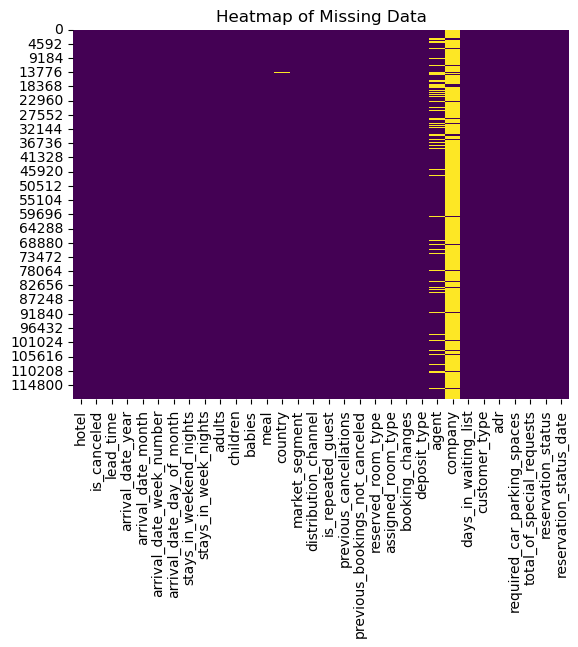

In [88]:
# Visualizing missing data using a heat map
sns.heatmap(data.isna(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
filename = "heatmap_missing_data.png"
filepath = os.path.join(images_dir, filename)
plt.savefig(filepath)
# print(f"saved: {filepath}")
plt.show()

From the heatmap it seems some categorical data in Agent and company NULL is presented as a categorical variables hence not considered a missing value rather a NA(Not Applicable ) for instance Agent defined as Null meaning the booking was not from a travel agent same with that of company.

# Duplicating the dataset

In [89]:
df = data.copy()
df.shape

(119390, 32)

In [90]:
## Checking numerical data and categorical data
# Numerical data 
numerical_cols = df.select_dtypes(include='number').columns
numerical_cols

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [91]:
# Categorical data
categorical_cols = df.select_dtypes(exclude='number').columns
categorical_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

# Handling Missing Values
## Company 
> Replacing missing values with 0

In [92]:
# Filling missing values in the company column with 0
df['company'] = df['company'].fillna(0)

# Displaying unique values in the company column
df['company'].unique()

array([  0., 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [93]:
# checking the shape if still the same
df.shape

(119390, 32)

## Agent column

In [94]:
# Checking unique values and if 0 exists in the agent column
df['agent'].unique()

if 0 in df['agent'].unique():
    print('0 exists')
else:
    print('0 does not exist')

0 does not exist


In [95]:
# Filling missing values in agent column with 0
df['agent'] = df['agent'].fillna(0)
df['agent'].unique()

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [96]:
# checking the shape afterfilling missing values
df.shape

(119390, 32)

## Country

In [97]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

* Since both hotels are located in Portugal if the value is unknown i will categorize as Portugal(PRT)
* Some Countries have nan values with abbreviation UNK undefined hence i will decide later whether to change it to Portugal(PRT)

In [98]:
# Replacing nan valaues
df['country'] = df['country'].replace(np.nan, 'UNK')
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'UNK', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA', 

In [99]:
# Countries with 'CN' and 'CHN' seem to be of one country which is China
# Unifying both 
df['country'] = df['country'].replace('CN', 'CHN')

# Checking on the Unique values in country column
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'UNK', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CHN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH',

In [100]:
df.shape

(119390, 32)

## Children

In [101]:
# Checking for missing values
df.loc[df['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0.0,0.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,0.0,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,0.0,0.0,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,0.0,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [102]:
# Filling the 4 missing values with 0 in children column
df['children'] = df['children'].fillna(0).astype(int)

# Displaying the unique values in children column
df['children'].unique()

array([ 0,  1,  2, 10,  3])

In [103]:
# Verifying the success in handling on missing values in children column
print(df['children'].copy().unique())

[ 0  1  2 10  3]


In [27]:
# Checking the shape of DataFrame
df.shape

(119390, 32)

## Verifying that all missing values have been handled well

In [104]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

* All missing values have therefore been handled succesfully

# Handling Duplicates

In [105]:
# Checking on duplicates
df.duplicated().sum()

31994

In [106]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [107]:
# checkingthe shape of DataFrame after removing duplicates
df.shape

(87396, 32)

# Mapping the Data

In [108]:
# checking data for each column
for col in df.columns:
    print(f"{col} :\n{df[col].unique()}\n")

hotel :
['Resort Hotel' 'City Hotel']

is_canceled :
[0 1]

lead_time :
[342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193

### Company and agent columns are in type floats therefore i have to convert them into integers

In [109]:
# converting company and agents columns to integer type
df['company'] = df['company'].astype(int)
df['company'] = df['company'].astype(int)

### In the meal column the undefined section i will have to replace with self_catering denoted as SC

In [110]:
# Mapping values in the meal column
meal_mapping = {
    'Undefined': 'SC', # Replacing undefined with SC
    'SC': 'SC', # Self-catering
    'BB': 'BB', # Bed & Breakfast
    'HB': 'HB', # Half board
    'FB': 'FB' # Full board
}
df['meal'] = df['meal'].map(meal_mapping)

## Sorting months in correct order

In [111]:
# Specifying the order of month names
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Converting 'arrival_date_month' to categorical data type
df['arrival_date_month'] = pd.Categorical(
    df['arrival_date_month'],
    categories=month_order,
    ordered=True
)

In [36]:
# Converting the "reservation_status_date" column to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

## Adding a year-month column to the DataFrame

In [112]:
# Combining year and month columns to create 'year_month' column
df['year_month'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str)

# Defining the order for year_month values
year_month_order = [
    '2015-July', '2015-August', '2015-September', '2015-October', '2015-November', '2015-December',
    '2016-January', '2016-February', '2016-March', '2016-April', '2016-May', '2016-June',
    '2016-July', '2016-August', '2016-September', '2016-October', '2016-November', '2016-December',
    '2017-January', '2017-February', '2017-March', '2017-April', '2017-May,' '2017-June',
    '2017-July', '2017-August'
]

# Converting 'year_month' to categorical type
df['year_month'] = pd.Categorical(df['year_month'], categories=year_month_order, ordered=True)

# Displayinr year_month column
df['year_month']

0           2015-July
1           2015-July
2           2015-July
3           2015-July
4           2015-July
             ...     
119385    2017-August
119386    2017-August
119387    2017-August
119388    2017-August
119389    2017-August
Name: year_month, Length: 87396, dtype: category
Categories (25, object): ['2015-July' < '2015-August' < '2015-September' < '2015-October' ... '2017-April' < '2017-May,2017-June' < '2017-July' < '2017-August']

# Visualizing numerical and categorical data

In [113]:
# numerical data and categorical datas
numerical_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

In [114]:
numerical_summary = df[numerical_cols].describe()
numerical_summary

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [115]:
categorical_summary = df[categorical_cols].astype('category').describe()
categorical_summary

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,year_month
count,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,87396,78573
unique,2,12,4,177,8,5,10,12,3,4,3,926,24
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2016-02-14,2017-July
freq,53428,11257,67978,27453,51618,69141,56552,46313,86251,71986,63371,211,4532


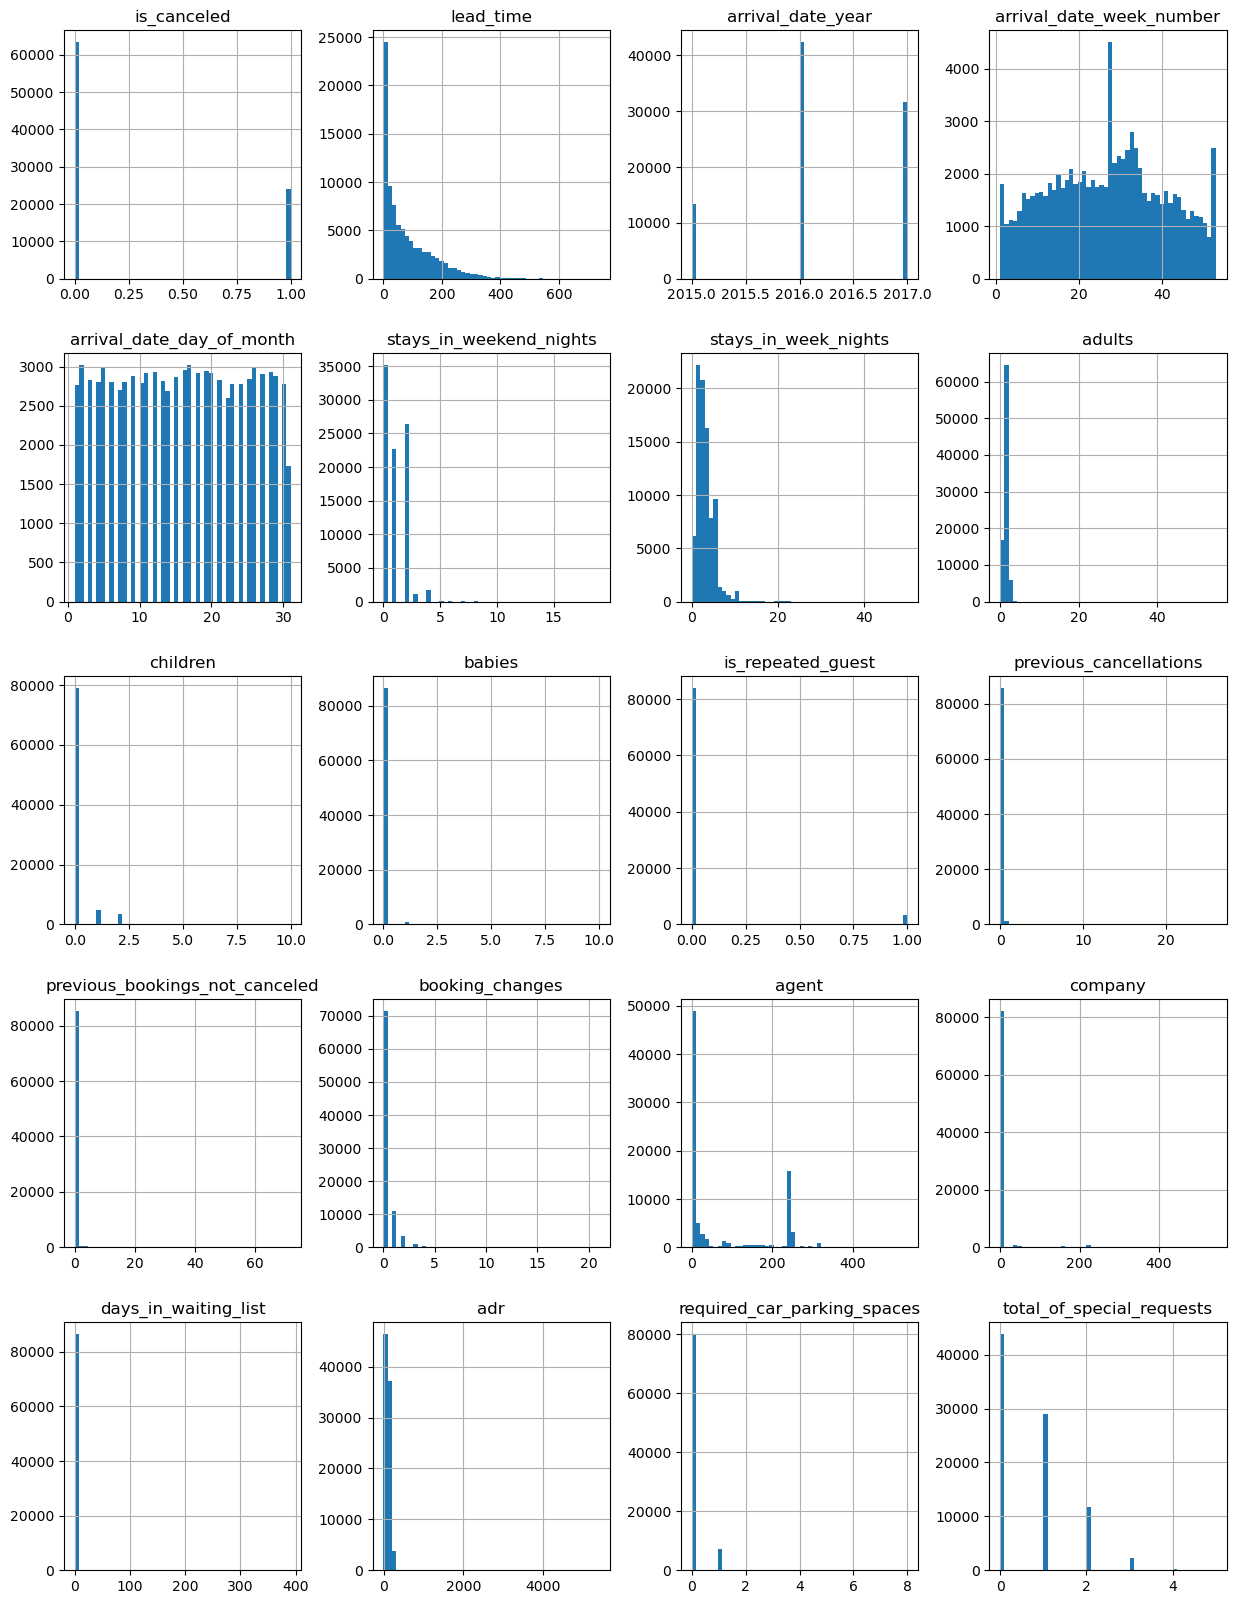

In [41]:
# Visualizing numerical data
df[numerical_cols].hist(bins=50, figsize=(15,20))
plt.show()

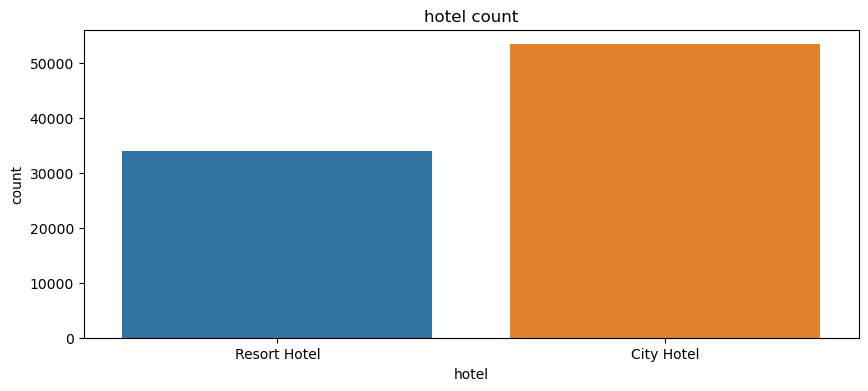

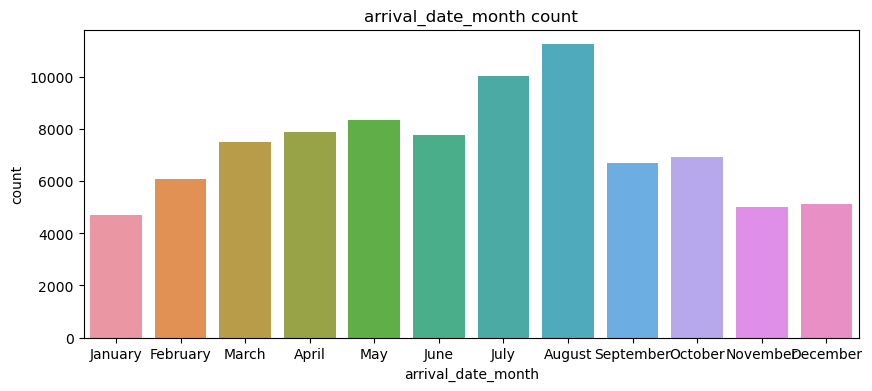

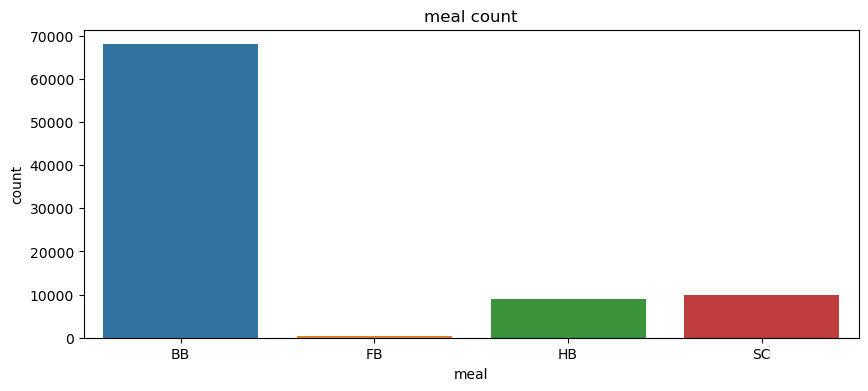

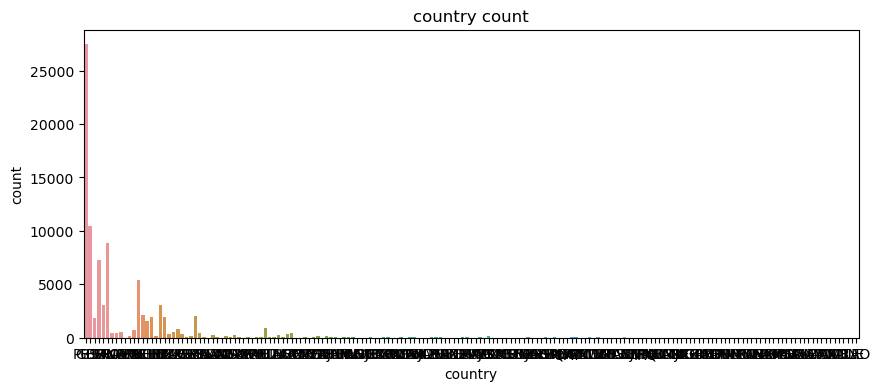

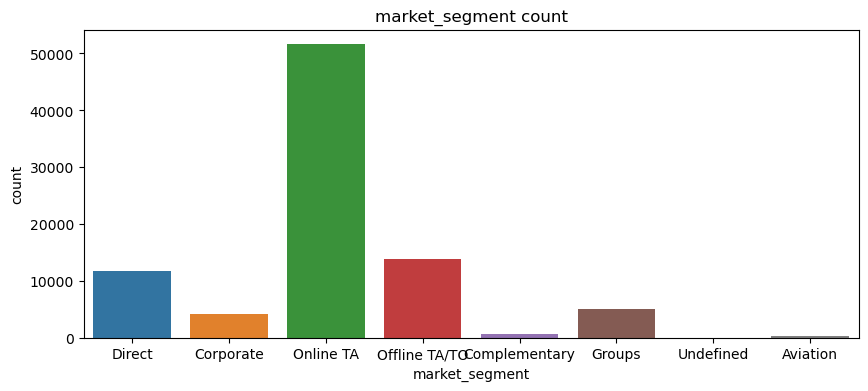

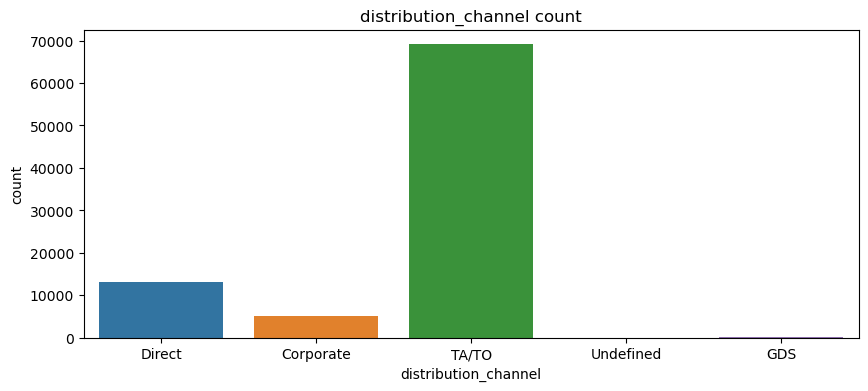

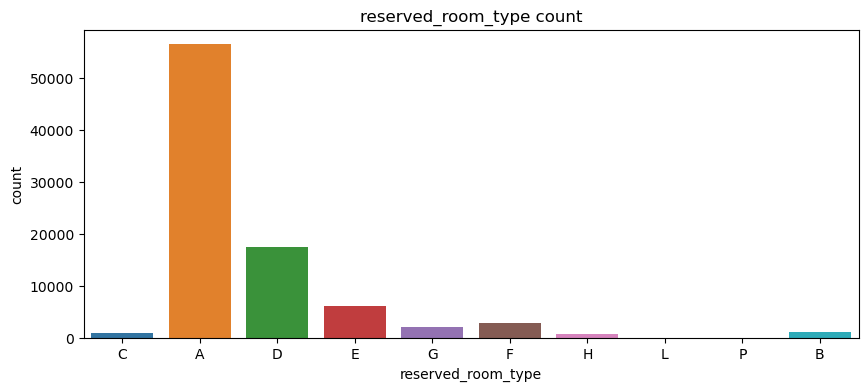

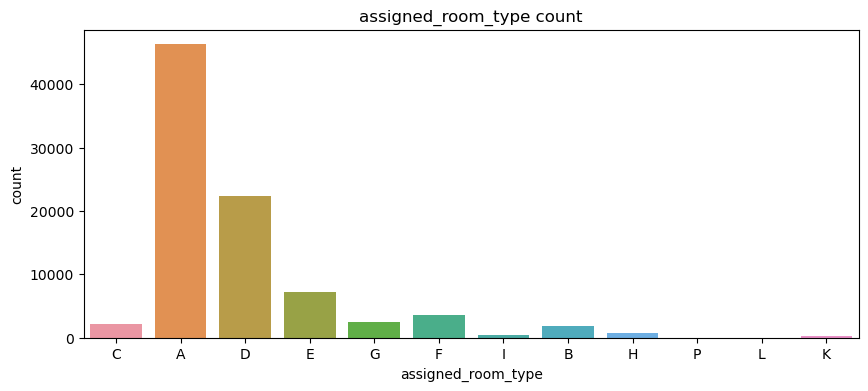

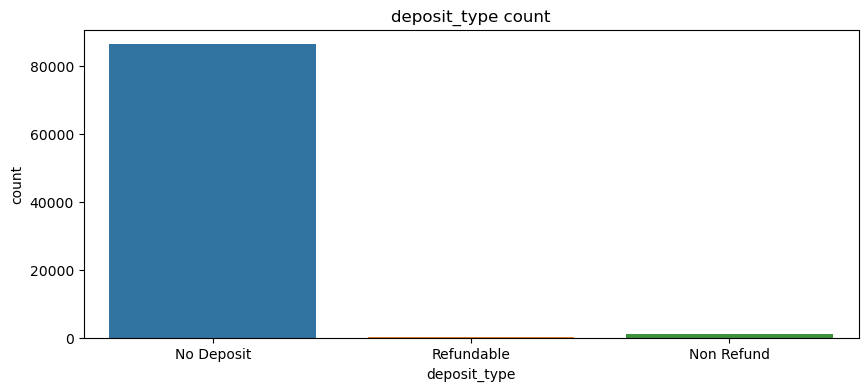

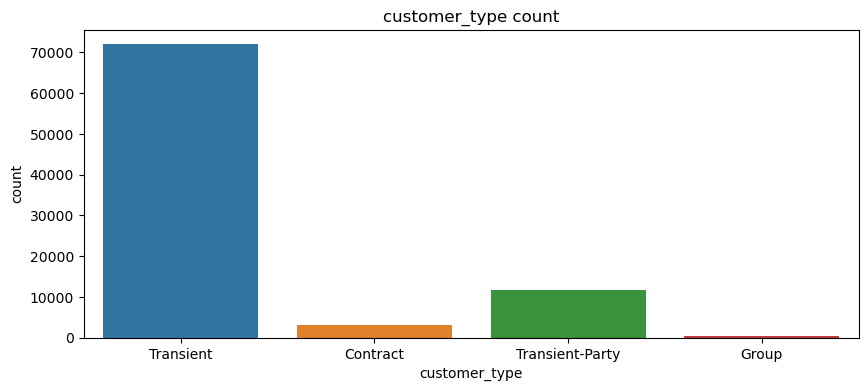

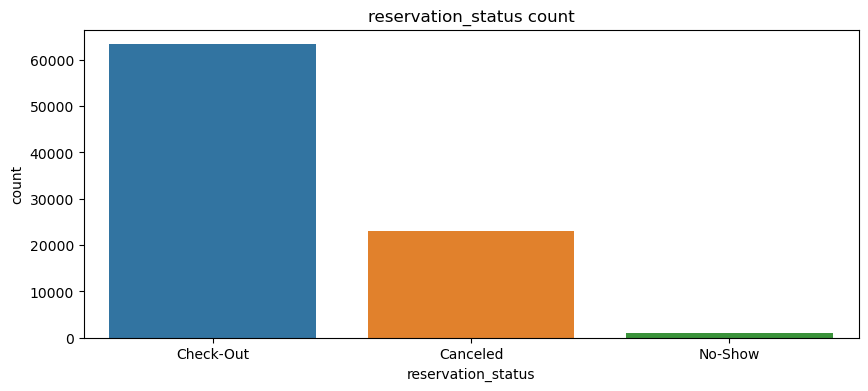

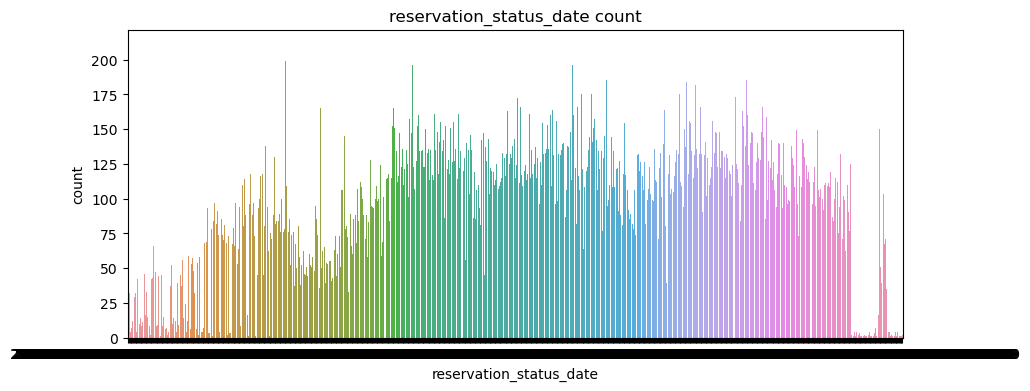

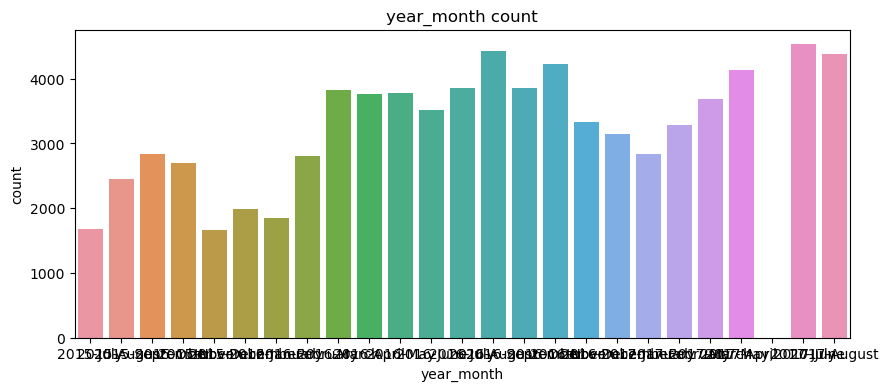

In [42]:
for col in categorical_cols:
    plt.figure(figsize=(10,4)) # setting figure size
    sns.countplot(data=df, x=col) # creating a bar plot for categorical data
    
    plt.title(f"{col} count") # Adding title using using column name
    plt.xlabel(col) # Labeling the x-axis
    plt.ylabel('count') # Labeling the y-axis
    
    
    
    plt.show() # displaying the plot

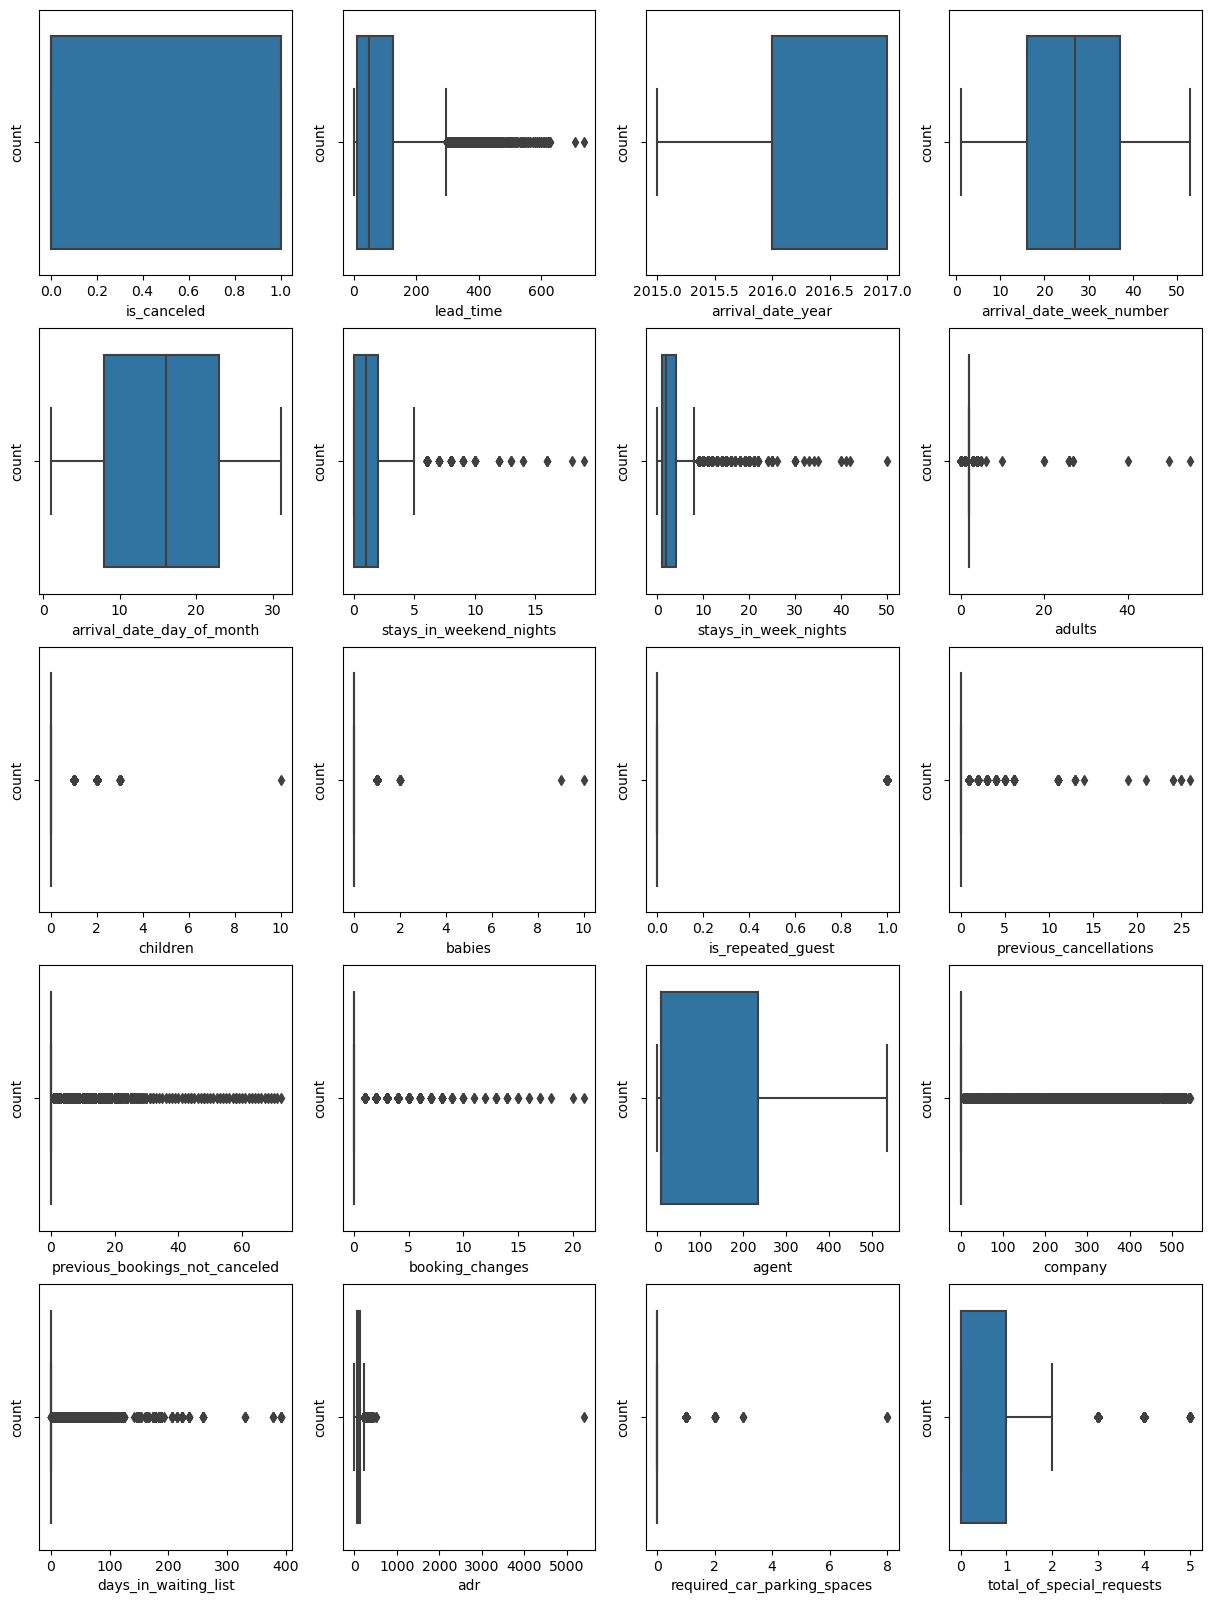

In [43]:
plt.figure(figsize=(15,20)) # Setting the overall figure size
           
for i,col in enumerate(numerical_cols): # Iterating through numerical columns
    plt.subplot(5, 4, i+1) # Creating a grid of subplots with 5 rows and 4 columns
    sns.boxplot(data=df, x=col) # Drawing a box plot for each numerical column
           
    plt.xlabel(col) # Labeling the x-axis with column name
    plt.ylabel('count') # Labeling the y-axis as 'count'
           
plt.show()

# Correlation Analysis

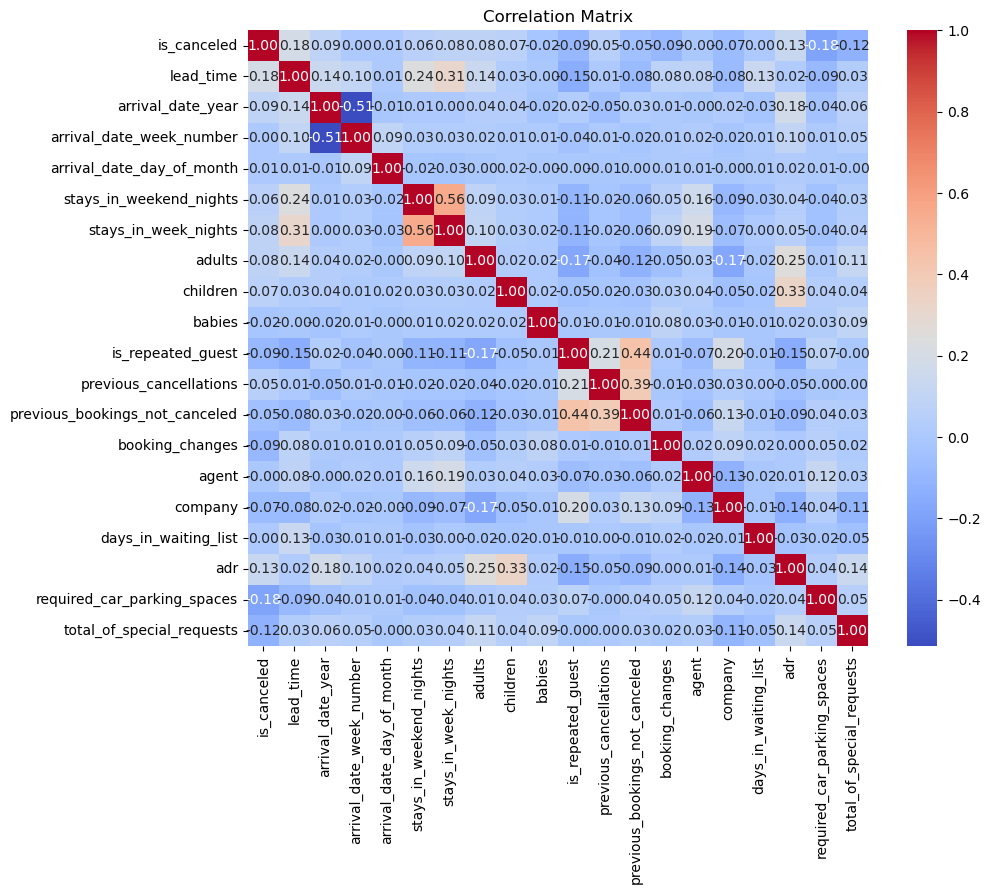

In [117]:
# Correlation for numerical data
correlation_matrix = df[numerical_cols].corr() 

plt.figure(figsize=(10,8)) 
sns.heatmap(correlation_matrix, annot=True, fmt='.2f',cmap='coolwarm') # Creating heatmap with annotations
plt.title('Correlation Matrix')
filename = "correlation_matrix.png"
filepath = os.path.join(images_dir, filename)
plt.savefig(filepath)
# print(f"saved: {filepath}")
plt.show()

- Correlation between weekend stays and weekday stays
- Correlation between repeated visits and not canceling reservations
- Correlation between cancellations and the lead time until actual visits
- Special request/parking space requests are inversely proportional to cancellations

# Outlier Handling

In [118]:
# Checking for data outside of outlier range
for col in numerical_cols:
    q1 = df[col].quantile(0.25) # Calculating the first quantile
    q3 = df[col].quantile(0.75) # Calculating the third quantile
    iqr = q3 - q1 # Calculating the interquartile range(IQR)
    lower_bound = q1 - 1.5 * iqr # Calculating the lower bound for outliers
    upper_bound = q3 + 1.5 * iqr # Calculating the upper bound for outliers
    
    mean = df[col].mean() # Calculating the mean of columns
    max = df[col].max() # Identifying the maximum values in the column
    min = df[col].min() # Identifying the minimum values in the column
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)] # Identifying the outlier rows
    
    # Printing the upper bound vs max value and lower bound vs min value for each column
    print(f"{col}\n upper bound : {upper_bound}, max: {max} / lower bound : {lower_bound}, min : {min}")

is_canceled
 upper bound : 2.5, max: 1 / lower bound : -1.5, min : 0
lead_time
 upper bound : 296.0, max: 737 / lower bound : -160.0, min : 0
arrival_date_year
 upper bound : 2018.5, max: 2017 / lower bound : 2014.5, min : 2015
arrival_date_week_number
 upper bound : 68.5, max: 53 / lower bound : -15.5, min : 1
arrival_date_day_of_month
 upper bound : 45.5, max: 31 / lower bound : -14.5, min : 1
stays_in_weekend_nights
 upper bound : 5.0, max: 19 / lower bound : -3.0, min : 0
stays_in_week_nights
 upper bound : 8.5, max: 50 / lower bound : -3.5, min : 0
adults
 upper bound : 2.0, max: 55 / lower bound : 2.0, min : 0
children
 upper bound : 0.0, max: 10 / lower bound : 0.0, min : 0
babies
 upper bound : 0.0, max: 10 / lower bound : 0.0, min : 0
is_repeated_guest
 upper bound : 0.0, max: 1 / lower bound : 0.0, min : 0
previous_cancellations
 upper bound : 0.0, max: 26 / lower bound : 0.0, min : 0
previous_bookings_not_canceled
 upper bound : 0.0, max: 72 / lower bound : 0.0, min : 0
book

### The following columns do not need to be checked for outliers
- is_canceled
- arrival_date_year
- arrival_date_week_number
- arrival_date_day_if_month
- is_repeated_guest,
- agent
- company

## Removing conflicting data if no one is present

In [119]:
# check cases with no people in the booking 
no_adults = df['adults'] == 0
no_children = df['children'] == 0
no_babies = df['babies'] == 0
no_people = no_adults & no_children & no_babies # identify rows where there are no adults, children or babies

df[no_people].shape

(166, 33)

In [120]:
# Removing rows with no people in the booking
df = df[~no_people] # Excluding rows where all counts(adults, children and baies) are 0

df.shape # New shape of the dataframe

(87230, 33)

# Graphical representation

## Monthly customer visit ratio

In [48]:
df['arrival_date_month'].value_counts()

August       11242
July         10043
May           8344
April         7900
June          7756
March         7489
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: arrival_date_month, dtype: int64

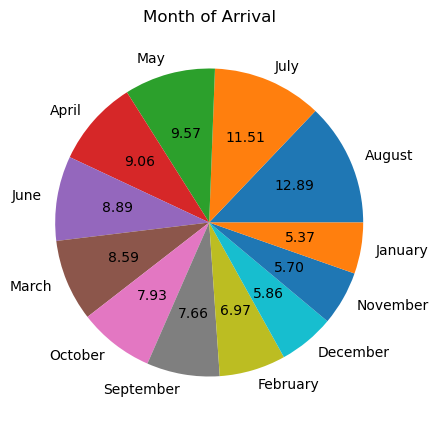

In [123]:
# Visualization
plt.figure(figsize=(5,5))

plt.pie(
    df['arrival_date_month'].value_counts(),
    labels=df['arrival_date_month'].value_counts().index,
    autopct='%0.2f',
    startangle=0,
)
plt.title('Month of Arrival')
filename = "month_of_arrival.png"
filepath = os.path.join(images_dir, filename)
plt.savefig(filepath)
# print(f"saved: {filepath}")
plt.show()

### It appears that August and July have higher visits, while January and November have a lower visits ratio

## Customer Visits Per Country

In [50]:
df['country'].value_counts()

PRT    27355
GBR    10424
FRA     8823
ESP     7244
DEU     5385
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

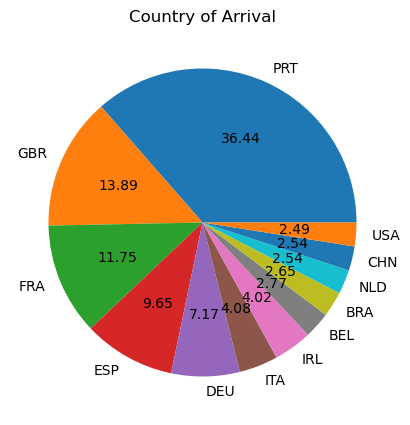

In [124]:
plt.figure(figsize=(5,5))

# Selecting top 12 countries
plt.pie(
    df['country'].value_counts().head(12),
    labels=df['country'].value_counts().head(12).index,
    autopct='%0.2f',
    startangle=0,
)
plt.title('Country of Arrival')
filename = "countrt_of_arrival.png"
filepath = os.path.join(images_dir, filename)
plt.savefig(filepath)
plt.show()

Portugal has the leading customers with other european countries having more customers in the top 12 countries.

## Hotel percentage of customers

In [52]:
hotel_proportion = df['hotel'].value_counts(normalize=True)
hotel_proportion

City Hotel      0.61073
Resort Hotel    0.38927
Name: hotel, dtype: float64

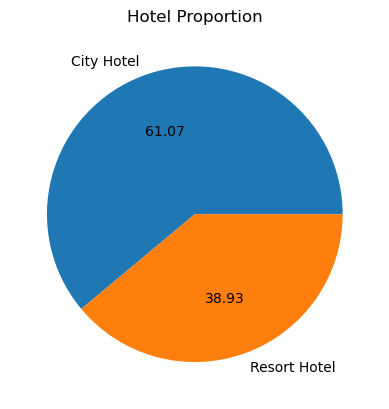

In [125]:
# Visualizing
plt.pie(
    hotel_proportion,
    labels=hotel_proportion.index,
    autopct='%0.2f',
    startangle=0,
)
plt.title('Hotel Proportion')
filename = "hotel_proportion.png"
filepath = os.path.join(images_dir, filename)
plt.savefig(filepath)
plt.show()

Selection of City hotel is high compared with the resort hotel.

### Percentage of Adults, Children and Babies

In [54]:
people_sum = df[['adults', 'children', 'babies']].sum()
people_proportion = people_sum / people_sum.sum()
people_proportion

adults      0.926203
children    0.068452
babies      0.005345
dtype: float64

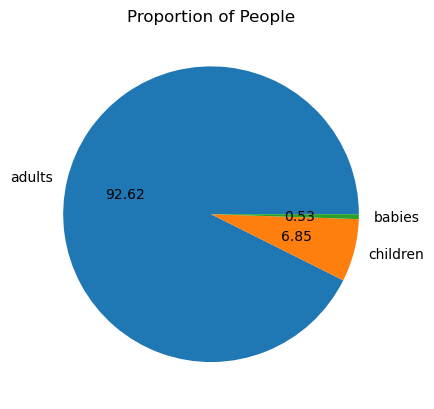

In [126]:
plt.pie(
    people_proportion,
    labels=people_proportion.index,
    autopct='%0.2f',
    startangle=0,
)

plt.title('Proportion of People')
filename = "proportion_of_people.png"
filepath = os.path.join(images_dir, filename)
plt.savefig(filepath)
plt.show()

The proportion of adults is overwhelming compared to children and babies.

# Recommendation

### Recommendations for Hotel Management:
* Pricing: Optimize pricing based on weekday/weekend stay patterns and seasonal demand (July/August peak, January/November low). Offer package deals and dynamic pricing.
* Loyalty: Implement a strong loyalty program to reward repeat guests and reduce cancellations, given the correlation between the two.
* Cancellations: Analyze cancellation patterns by lead time and adjust policies (e.g., tiered fees) to minimize revenue loss.
* Amenities: Evaluate and potentially expand availability of popular special requests like parking, communicating availability clearly to guests.
* Marketing: Target Portugal heavily, expand marketing to other European countries, and address the city hotel preference by enhancing resort offerings. Consider family-friendly packages despite the primarily adult demographic.
* Operations: Optimize staffing based on demand fluctuations. Analyze cancellations to identify causes and improve preventative measures.